In [1]:
### Modelling objective: Personal medical cost prediction
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
# to import dataset
df = pd.read_csv('C:/Users/miche/Desktop/machine_learning/insurance.csv')

In [4]:
# to check for missing variables
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
# to check & remove duplicated variables
duplicates = df[df.duplicated()]

In [6]:
# there is one row of duplicated value
duplicates

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [7]:
# to remove duplicated rows
df = df.drop_duplicates(keep='first', inplace=False)

In [8]:
# to check if variables are in their correct data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


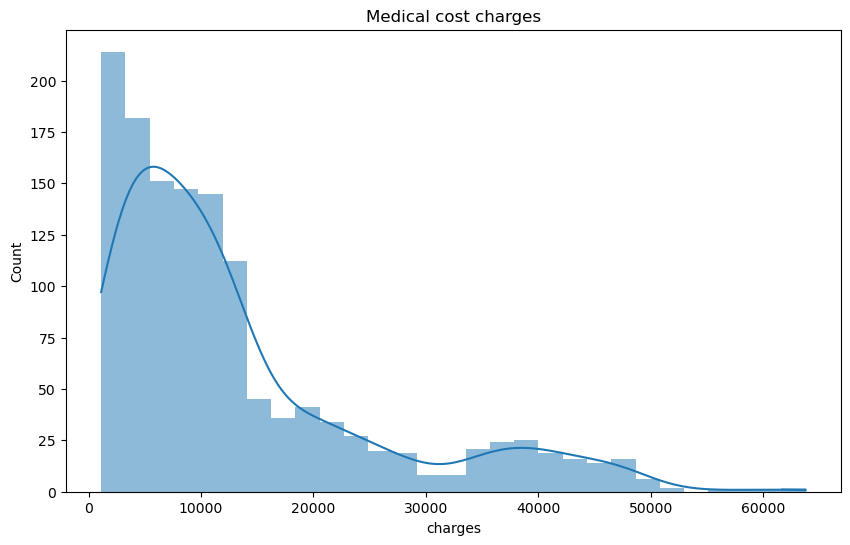

In [9]:
# this is a regression problem, 'charges' is the target variable
# a histogram of 'charges', majority of the medical charges falls within the lower range, $10,000
plt.figure(figsize=(10,6), dpi=100)
sns.histplot(data=df, x='charges', edgecolor=None, kde=True)
plt.title('Medical cost charges');

In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
df['age'].describe()

count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

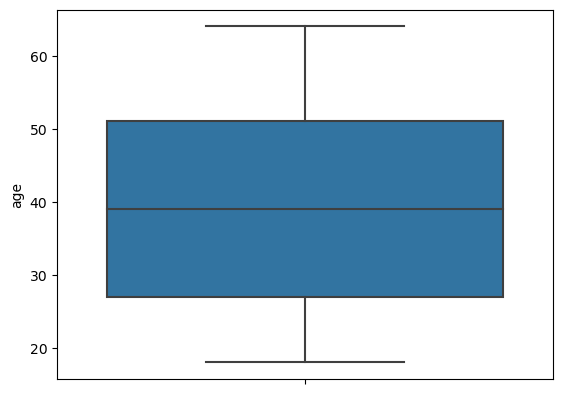

In [12]:
# the median age of patients is about 40 years
sns.boxplot(data=df, y='age');

In [13]:
# to segregate age into different categories using def custom function
def age_categories(s):
    if 18 <= s <= 30:
        return '18 to 30'
    if 31 <= s <= 42:
        return '31 to 42'
    if 43 <= s <= 55:
        return '43 to 55'
    if  56 <= s:
        return 'above 56'

In [14]:
# to apply custom function to create new age_category column
df['age_categories'] = df['age'].apply(age_categories)

In [15]:
df.head()

,age,sex,bmi,children,smoker,region,charges,age_categories
0,19,female,27.900,0,yes,southwest,16884.92400,18 to 30
1,18,male,33.770,1,no,southeast,1725.55230,18 to 30
2,28,male,33.000,3,no,southeast,4449.46200,18 to 30
3,33,male,22.705,0,no,northwest,21984.47061,31 to 42
4,32,male,28.880,0,no,northwest,3866.85520,31 to 42


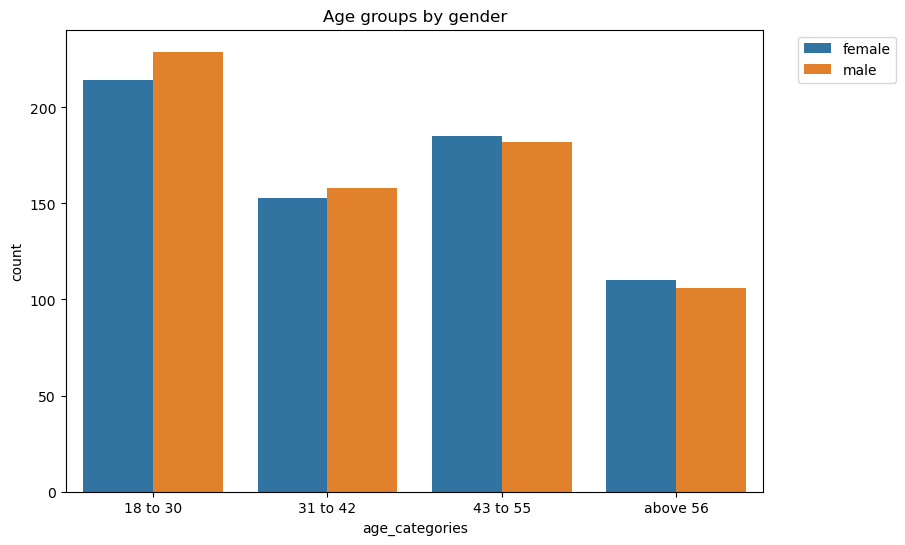

In [16]:
# Exploratory Data analysis
# majority of the insurance policy holders are between 18 to 30 and 43 to 55 years
plt.figure(figsize=(9,6), dpi=100)
sns.countplot(data=df, x='age_categories', hue='sex')
plt.title('Age groups by gender')
plt.legend(bbox_to_anchor=(1.2,1.0));

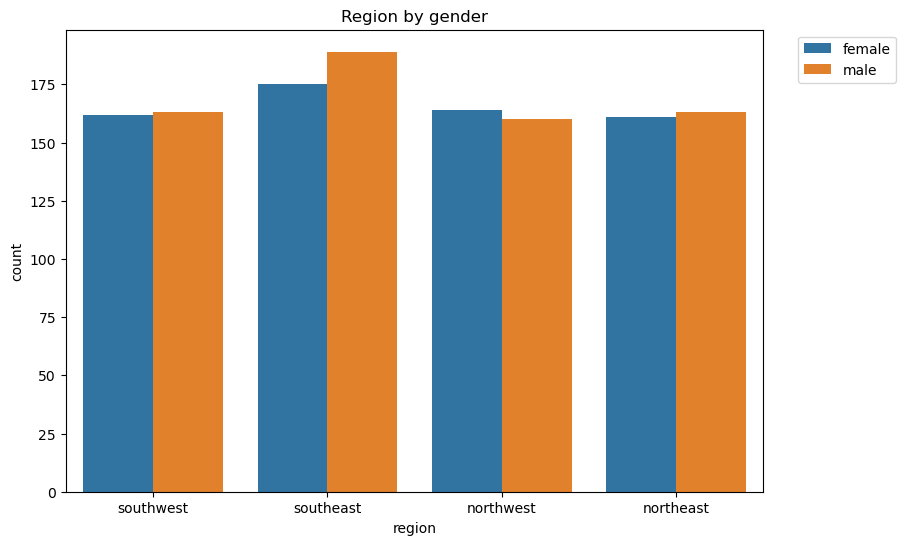

In [17]:
# majority of the patients are from 'southeast'
plt.figure(figsize=(9,6), dpi=100)
sns.countplot(data=df, x='region', hue='sex')
plt.title('Region by gender')
plt.legend(bbox_to_anchor=(1.2,1.0));

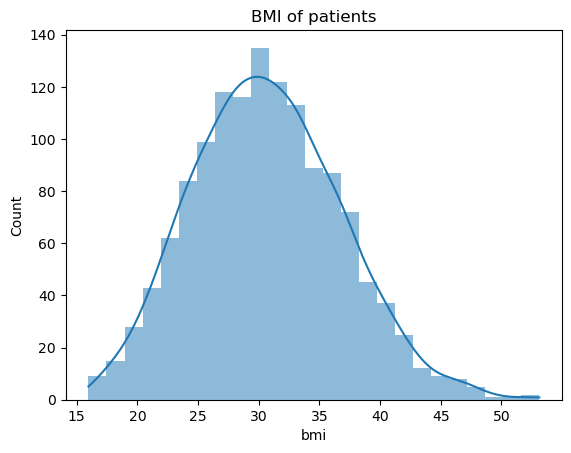

In [81]:
# to plot a histogram of 'bmi' of all patients
# the 'bmi' of all insurance policy holders seems to fit the normal distribution
sns.histplot(data=df, x='bmi', edgecolor=None, kde=True)
plt.title('BMI of patients');

In [83]:
df.select_dtypes(['int','float'])

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [85]:
# to see correlation of all numeric variables
df.select_dtypes(['int','float']).corr()

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


Text(0.5, 1.0, 'Correlation')

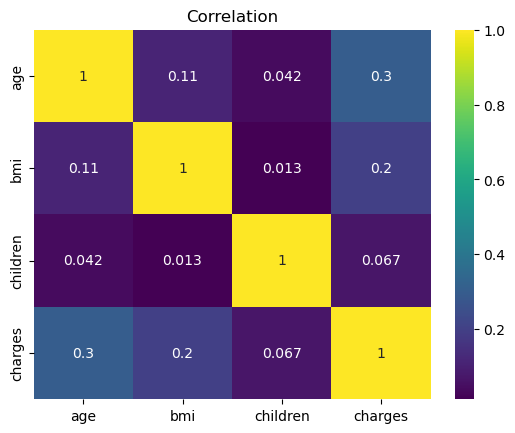

In [89]:
# to visualise correlations in a heatmap
sns.heatmap(data=df.select_dtypes(['int','float']).corr(), annot=True, cmap='viridis');
plt.title('Correlation')

In [90]:
# to see correlation of all numeric variables against 'charges'
# age has the highest correlation to the medical costs insurances
df.select_dtypes(['int','float']).corr()['charges']

age         0.298308
bmi         0.198401
children    0.067389
charges     1.000000
Name: charges, dtype: float64

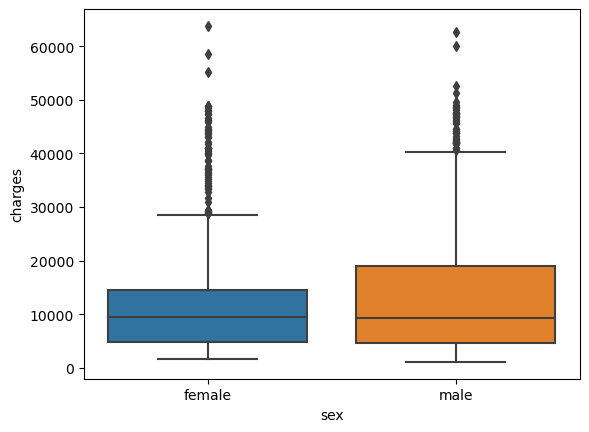

In [20]:
# Males tend to have higher medical costs insurances
sns.boxplot(data=df, x='sex', y='charges')
plt.title('Medical cost by Gender');

Text(0.5, 1.0, 'Medical costs by no. of children')

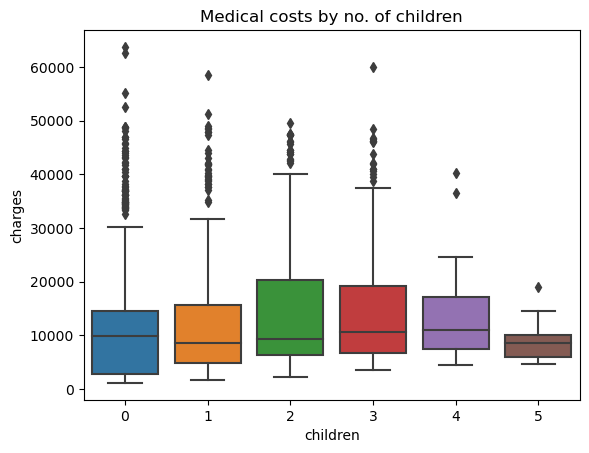

In [23]:
sns.boxplot(data=df, x='children', y='charges')
plt.title('Medical costs by no. of children')

Text(0.5, 1.0, 'Medical costs by Region')

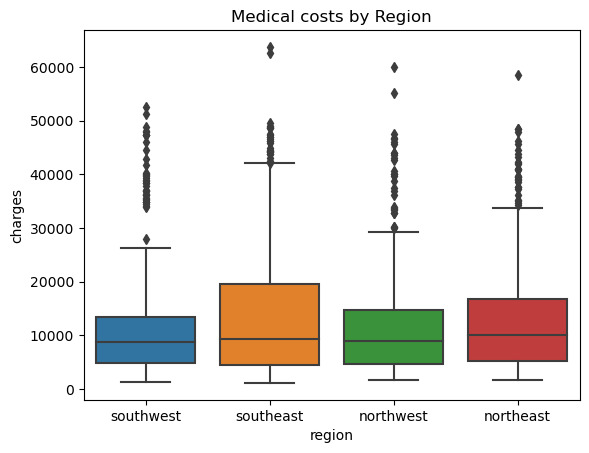

In [24]:
# Insurance policy holders residing in the SouthEast have a higher medical cost insurance
sns.boxplot(data=df, x='region', y='charges')
plt.title('Medical costs by Region')

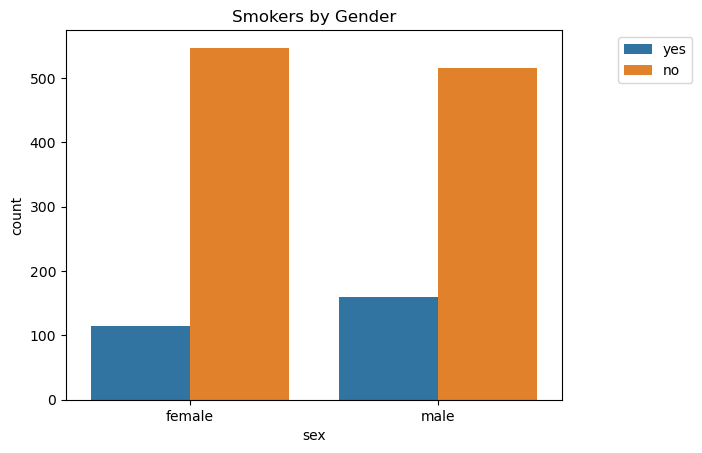

In [25]:
sns.countplot(data=df, x='sex', hue='smoker')
plt.title('Smokers by Gender')
plt.legend(bbox_to_anchor=(1.1,1.0));

In [26]:
# there are more male smokers among the insurance policy holders
pd.DataFrame(df.groupby(['sex','smoker'])['smoker'].count())

smoker
sex    smoker        
female no         547
       yes        115
male   no         516
       yes        159

In [27]:
# number of dependents covered by insurance policy
pd.DataFrame(df['children'].value_counts())

,count
children,
0,573
1,324
2,240
3,157
4,25
5,18


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1337 non-null   int64  
 1   sex             1337 non-null   object 
 2   bmi             1337 non-null   float64
 3   children        1337 non-null   int64  
 4   smoker          1337 non-null   object 
 5   region          1337 non-null   object 
 6   charges         1337 non-null   float64
 7   age_categories  1337 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 94.0+ KB


In [29]:
# to remove age categories before regression modelling
df = df.drop('age_categories',axis=1)

In [30]:
# to define X and y
X = df.drop('charges',axis=1)

In [31]:
# to convert into dummy varibles in X, drop_first = True to remove first column to remove multicollinearity
X = pd.get_dummies(X, drop_first=True)

In [32]:
y = df['charges']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
# testing data = 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [36]:
scaler = StandardScaler()

In [37]:
scaled_X_train = scaler.fit_transform(X_train)

In [38]:
scaled_X_test = scaler.transform(X_test)

In [39]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [40]:
from xgboost import XGBRegressor

In [41]:
from sklearn.tree import DecisionTreeRegressor

In [42]:
rf = RandomForestRegressor()

In [43]:
rf.fit(scaled_X_train,y_train)

RandomForestRegressor()

In [44]:
# random forest prediction on the X train data
rf_pred = rf.predict(scaled_X_test)

In [45]:
# to print first 10 medical charges
rf_pred[:10]

array([ 7499.3021307 ,  2189.92439907,  9994.5827933 , 11480.4150336 ,
        8269.6847198 ,  1990.6174869 , 13312.5775316 ,  6251.6777837 ,
        9793.642318  ,  4033.7844276 ])

In [46]:
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
mean_squared_error(y_test,rf_pred)

24196336.265405703

In [48]:
print('RandomForest_RMSE :', np.sqrt(mean_squared_error(y_test,rf_pred)))

RandomForest_RMSE : 4918.977156422431


In [49]:
# to see the r^2 score of the random forest regression model
testing_score = []

a = r2_score(y_test,rf_pred)*100
testing_score.append(a)

print(f'r2_score of {rf} model on Testing Data is: ', a) # Accuracy rate Random Forest regressor model = 82.8%

r2_score of RandomForestRegressor() model on Testing Data is:  82.73375126540617


In [50]:
ada = AdaBoostRegressor()

In [51]:
ada.fit(scaled_X_train,y_train)

AdaBoostRegressor()

In [52]:
ada_pred = ada.predict(scaled_X_test)

In [53]:
mean_squared_error(y_test,ada_pred)

26592909.944205772

In [54]:
print('AdaBoost_RMSE :', np.sqrt(mean_squared_error(y_test,ada_pred)))

AdaBoost_RMSE : 5156.831386055373


In [55]:
b = r2_score(y_test,ada_pred)*100
testing_score.append(b)

print(f'r2_score of {ada} model on Testing Data is: ', b) # AdaBoost regressor accuracy rate = 81%

r2_score of AdaBoostRegressor() model on Testing Data is:  81.02358172589183


In [56]:
gb = GradientBoostingRegressor()

In [57]:
gb.fit(scaled_X_train,y_train)

GradientBoostingRegressor()

In [58]:
gb_pred = gb.predict(scaled_X_test)

In [59]:
mean_squared_error(y_test,gb_pred)

22435457.664416544

In [60]:
print('GradientBoost_RMSE :', np.sqrt(mean_squared_error(y_test,gb_pred)))

GradientBoost_RMSE : 4736.608244769303


In [61]:
c = r2_score(y_test,gb_pred)*100
testing_score.append(c)

print(f'r2_score of {gb} model on Testing Data is: ', c) # Gradient Boost regressor accuracy rate = 84%

r2_score of GradientBoostingRegressor() model on Testing Data is:  83.99029554478005


In [62]:
xg = XGBRegressor()

In [63]:
xg.fit(scaled_X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [64]:
xg_pred = xg.predict(scaled_X_test)

In [65]:
mean_squared_error(y_test,xg_pred)

27230998.52991806

In [66]:
print('XGBoost_RMSE :', np.sqrt(mean_squared_error(y_test,xg_pred)))

XGBoost_RMSE : 5218.3329263202495


In [67]:
d = r2_score(y_test,xg_pred)*100
testing_score.append(d)

print(f'r2_score of {xg} model on Testing Data is: ', d) # XGBoost regressor accuracy rate= 81%

r2_score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) model on Testing Data is:  80.56824848391811


In [68]:
dt = DecisionTreeRegressor()

In [69]:
dt.fit(scaled_X_train,y_train)

DecisionTreeRegressor()

In [70]:
dt_pred = dt.predict(scaled_X_test)

In [71]:
mean_squared_error(y_test,dt_pred)

46271866.269939385

In [72]:
print('DecisionTree_RMSE :', np.sqrt(mean_squared_error(y_test,dt_pred)))

DecisionTree_RMSE : 6802.342704534915


In [73]:
e = r2_score(y_test,dt_pred)*100
testing_score.append(e)

print(f'r2_score of {dt} model on Testing Data is: ', e) # Decision tree regressor model = 67%

r2_score of DecisionTreeRegressor() model on Testing Data is:  66.9808873679397


In [74]:
gb.feature_importances_

array([0.10767128, 0.19591277, 0.00786736, 0.00075037, 0.68443932,
       0.00081446, 0.0018472 , 0.00069723])

In [75]:
importance_gb = gb.feature_importances_

In [76]:
gb_imp = pd.DataFrame(data = importance_gb, index= X.columns, columns=['Importance'])

In [77]:
gb_imp = gb_imp.sort_values('Importance', ascending=False)

In [79]:
gb_imp

,Importance
smoker_yes,0.684439
bmi,0.195913
age,0.107671
children,0.007867
region_southeast,0.001847
region_northwest,0.000814
sex_male,0.000750
region_southwest,0.000697


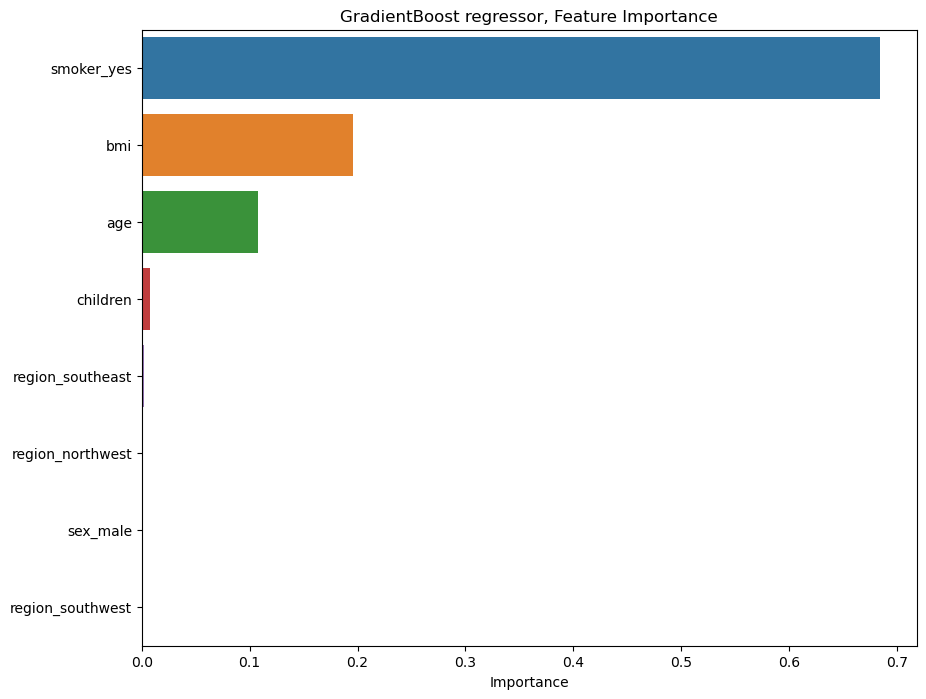

In [80]:
# Top 3 predictor of insurance medical costs are 'smoker_yes', 'bmi','age'
# to visualise in a barplot
plt.figure(figsize=(10,8), dpi=100)
sns.barplot(data=gb_imp, x='Importance', y=gb_imp.index)
plt.title('GradientBoost regressor, Feature Importance');